In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub
import streamlit as st
import fontstyle as font
import scipy.stats as st
import xgboost as xgb
import tensorflow as tf
import pmdarima as pm
import pymysql
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import requests
import csv
from bson import ObjectId
from bs4 import BeautifulSoup
from tabulate import tabulate
from datetime import datetime
from IPython.display import display, Markdown, HTML
from pymongo import MongoClient
from pymongo.server_api import ServerApi
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from ydata_profiling import ProfileReport
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering,MeanShift, estimate_bandwidth, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings('ignore')

In [3]:
#################################### PART A – Regression modelling for business decision making  ####################################

In [5]:
### TASK 1 – Data Preprocessing

In [7]:
# A – Cleaning the Dataset, handling missing values, and removing outliers

In [11]:
# Downloading the datasetfrom Kaggle.com
file_path = kagglehub.dataset_download("equilibriumm/sleep-efficiency")

print("File location of the dataset:", file_path)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 8.94k/8.94k [00:00<00:00, 2.29MB/s]

Extracting files...
File location of the dataset: C:\Users\X\.cache\kagglehub\datasets\equilibriumm\sleep-efficiency\versions\3


In [105]:
# Reading the data from the downloaded CSV file
sleep = pd.read_csv('C:\\Users\\X\\.cache\\kagglehub\\datasets\\equilibriumm\\sleep-efficiency\\versions\\3\\Sleep_Efficiency.csv')

In [107]:
# Viewing the first few rows of the dataset
print(font.apply(f"First few rows of the Sleep Efficiency dataset", 'Bold/Blue/Underline'))
sleep.head()

First few rows of the Sleep Efficiency dataset


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [279]:
# Viewing the last few rows of the dataset
print(font.apply(f"Last few rows of the Sleep Efficiency dataset", 'Bold/Blue/Underline'))
sleep.tail()

Last few rows of the Sleep Efficiency dataset


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0
451,452,18,Male,2021-03-17 02:30:00,2021-03-17 10:00:00,7.5,0.63,22,23,55,1.0,50.0,0.0,No,1.0


In [111]:
# Checking the record counts and data types of the dataset
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [171]:
# Renaming columns to allow for a consistent format
sleep_clean = sleep.copy()
sleep_clean.rename(columns={'Caffeine consumption': 'Caffeine_Consumption', 'Alcohol consumption': 'Alcohol_Consumption', 'Exercise frequency':'Exercise_Frequency',
                    'Wakeup time':'Wakeup_Time', 'Sleep duration': 'Sleep_Duration', 'Sleep efficiency':'Sleep_Efficiency',
                     'REM sleep percentage':'REM_Sleep_Percentage', 'Deep sleep percentage':'Deep_Sleep_Percentage', 
                        'Light sleep percentage':'Light_Sleep_Percentage', 'Smoking status':'Smoking_Status' }, inplace=True)
sleep_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup_Time             452 non-null    object 
 5   Sleep_Duration          452 non-null    float64
 6   Sleep_Efficiency        452 non-null    float64
 7   REM_Sleep_Percentage    452 non-null    int64  
 8   Deep_Sleep_Percentage   452 non-null    int64  
 9   Light_Sleep_Percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine_Consumption    427 non-null    float64
 12  Alcohol_Consumption     438 non-null    float64
 13  Smoking_Status          452 non-null    object 
 14  Exercise_Frequency      446 non-null    fl

In [173]:
# Correcting the data type for Bedtime and Wakeup_Time
sleep_clean['Bedtime'] = pd.to_datetime(sleep_clean['Bedtime'], format='%Y-%m-%d %H:%M:%S')
sleep_clean['Wakeup_Time'] = pd.to_datetime(sleep_clean['Wakeup_Time'], format='%Y-%m-%d %H:%M:%S')

#Checking the updated datatypes
sleep_clean.dtypes

ID                                 int64
Age                                int64
Gender                            object
Bedtime                   datetime64[ns]
Wakeup_Time               datetime64[ns]
Sleep_Duration                   float64
Sleep_Efficiency                 float64
REM_Sleep_Percentage               int64
Deep_Sleep_Percentage              int64
Light_Sleep_Percentage             int64
Awakenings                       float64
Caffeine_Consumption             float64
Alcohol_Consumption              float64
Smoking_Status                    object
Exercise_Frequency               float64
dtype: object

In [175]:
# Checking for columns with null values
print(font.apply(f"NULL COUNTS PER COLUMN", 'Bold/Red/Underline'))
sleep_clean.isnull().sum().sort_values(ascending=False)

NULL COUNTS PER COLUMN


Caffeine_Consumption      25
Awakenings                20
Alcohol_Consumption       14
Exercise_Frequency         6
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup_Time                0
Sleep_Duration             0
Sleep_Efficiency           0
REM_Sleep_Percentage       0
Deep_Sleep_Percentage      0
Light_Sleep_Percentage     0
Smoking_Status             0
dtype: int64

In [177]:
# Dropping column not relevant to analysis - ID
sleep_clean = sleep_clean.drop(columns=['ID'])

In [179]:
# Identifying the categorical and numerical columns 
categorical = sleep_clean.select_dtypes(include=['object']).columns.tolist()
print(font.apply(f"Categorical Columns:\n{categorical}", 'Bold/Cyan'))

numerical = sleep_clean.select_dtypes(exclude=['object']).columns.tolist()
print(font.apply(f"\nNumerical Columns:\n{numerical}", 'Bold/Purple'))

Categorical Columns:
['Gender', 'Smoking_Status']

Numerical Columns:
['Age', 'Bedtime', 'Wakeup_Time', 'Sleep_Duration', 'Sleep_Efficiency', 'REM_Sleep_Percentage', 'Deep_Sleep_Percentage', 'Light_Sleep_Percentage', 'Awakenings', 'Caffeine_Consumption', 'Alcohol_Consumption', 'Exercise_Frequency']


In [181]:
# Handling missing values for numerical columns w/ null values - populate using skewness
if sleep_clean.select_dtypes(exclude=['object']).isnull().values.any() == True:
    for i, col in enumerate(numerical):
        if sleep_clean[col].isnull().sum() > 0:
            # Checking the skewness for each column
            skewness = sleep_clean[col].skew()
            label = font.apply(f"Skewness of {col} column: {skewness}", 'Bold/Blue')
            print('\033[20m'+ label)

            # Handling missing values based on skewness
            if abs(skewness) < 0.5:  # Threshold for near-normal distribution
                # Use mean for nearly normal distribution
                sleep_clean[col] = sleep_clean[col].fillna(sleep_clean[col].mean())
                #display({col}, churn[col].mean()))
                label = font.apply(f"{col} column has a near-normal distribution, therefore, null values are replaced by its mean value ({sleep_clean[col].mean()}).", 'Bold/Green/Yellow_BG')
                print('\033[20m'+ label+'\n')
            else:
                # Use median for skewed distribution
                sleep_clean[col] = sleep_clean[col].fillna(sleep_clean[col].median())
                label = font.apply(f"{col} column has a skewed distribution, therefore, null values are replaced by its median value ({sleep_clean[col].median()}).", 'Bold/Purple/Yellow_BG')
                print('\033[20m'+ label+'\n')
else:
    label = font.apply(f"No null values to fill for numerical columns.", 'Bold/Red')
    print('\033[20m'+ label)

Skewness of Awakenings column: 0.49180516416241593
Awakenings column has a near-normal distribution, therefore, null values are replaced by its mean value (1.641203703703704).

Skewness of Caffeine_Consumption column: 2.134104750194948
Caffeine_Consumption column has a skewed distribution, therefore, null values are replaced by its median value (25.0).

Skewness of Alcohol_Consumption column: 1.1410599652327764
Alcohol_Consumption column has a skewed distribution, therefore, null values are replaced by its median value (0.0).

Skewness of Exercise_Frequency column: 0.17111888899235828
Exercise_Frequency column has a near-normal distribution, therefore, null values are replaced by its mean value (1.7914798206278026).



In [183]:
# Verifying the columns after handling missing values
print(font.apply(f"NULL COUNTS PER COLUMN AFTER HANDLING MISSING VALUES", 'Bold/GREEN/Underline'))
sleep_clean.isnull().sum().sort_values(ascending=False)

NULL COUNTS PER COLUMN AFTER HANDLING MISSING VALUES


Age                       0
Gender                    0
Bedtime                   0
Wakeup_Time               0
Sleep_Duration            0
Sleep_Efficiency          0
REM_Sleep_Percentage      0
Deep_Sleep_Percentage     0
Light_Sleep_Percentage    0
Awakenings                0
Caffeine_Consumption      0
Alcohol_Consumption       0
Smoking_Status            0
Exercise_Frequency        0
dtype: int64

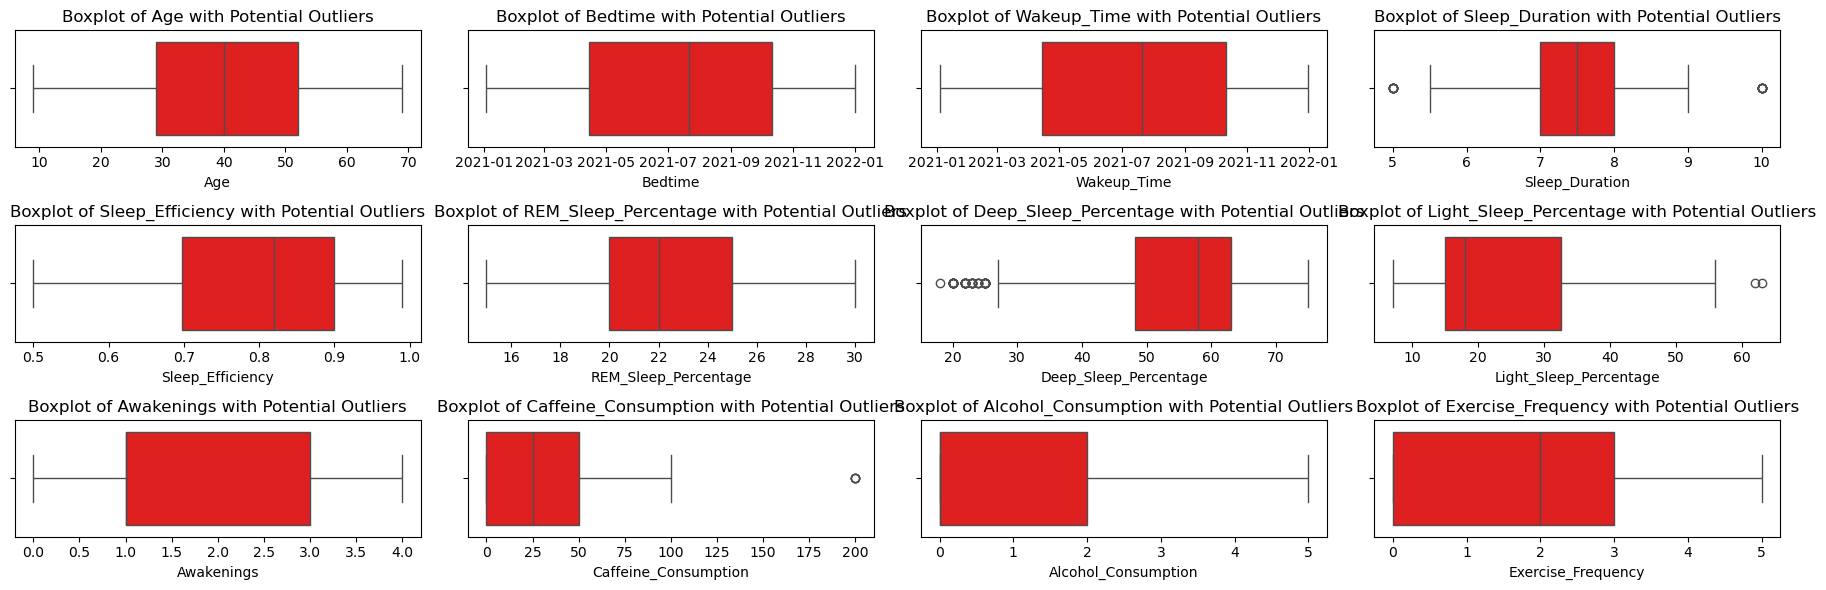

Numerical Variables with Potential Outliers:
Sleep_Duration
Deep_Sleep_Percentage
Light_Sleep_Percentage
Caffeine_Consumption


In [185]:
# Checking for potential outliers among the numerical values 
potential_outliers = {}

plt.figure(figsize=(18, 6))

# Function to identify and plot outliers for numerical columns
for i, col in enumerate(numerical,1):
    # Calculate Q1 and Q3 values
    Q1 = sleep_clean[col].quantile(0.25)
    Q3 = sleep_clean[col].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and store potential outliers
    potential_outliers[col] = sleep_clean[(sleep_clean[col] < lower_bound) | (sleep_clean[col] > upper_bound)]

    # Plot boxplot for the column
    plt.subplot(3, 4, i)
    sns.boxplot(x=sleep_clean[col], color = 'r')
    plt.title(f"Boxplot of {col} with Potential Outliers")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Print the numerical columns containing potential outliers
label = font.apply(f"Numerical Variables with Potential Outliers:", 'Bold/Red/Underline')
print('\033[20m'+ label)
for col, data in potential_outliers.items():
    if not data.empty:
        print(font.apply(col, "Red"))

Feature: Sleep_Duration
lower_bound 5.5
upper_bound 9.5


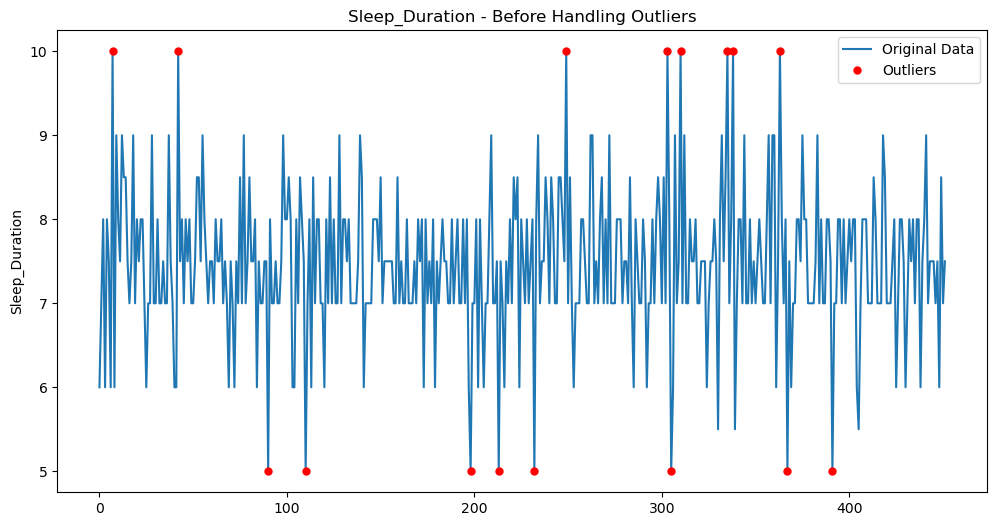

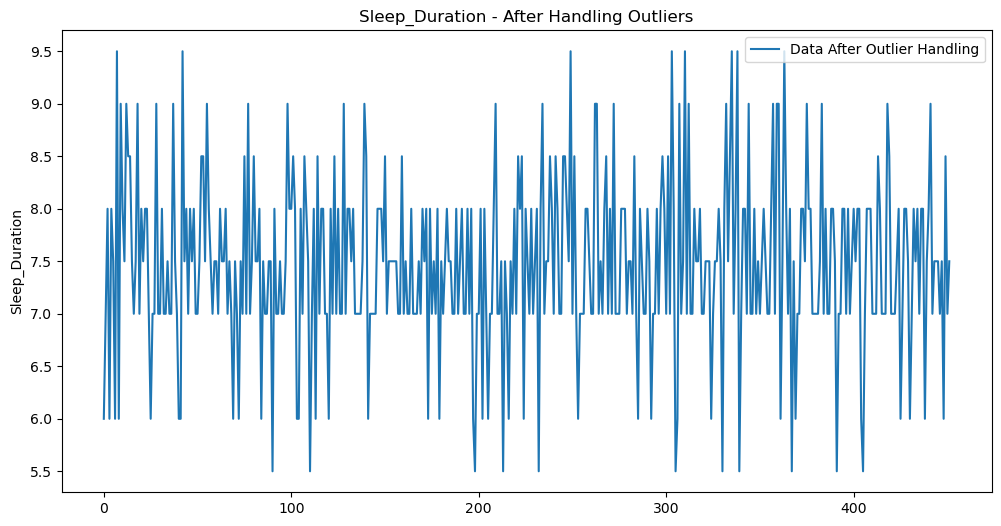

Feature: Deep_Sleep_Percentage
lower_bound 26.125
upper_bound 85.125


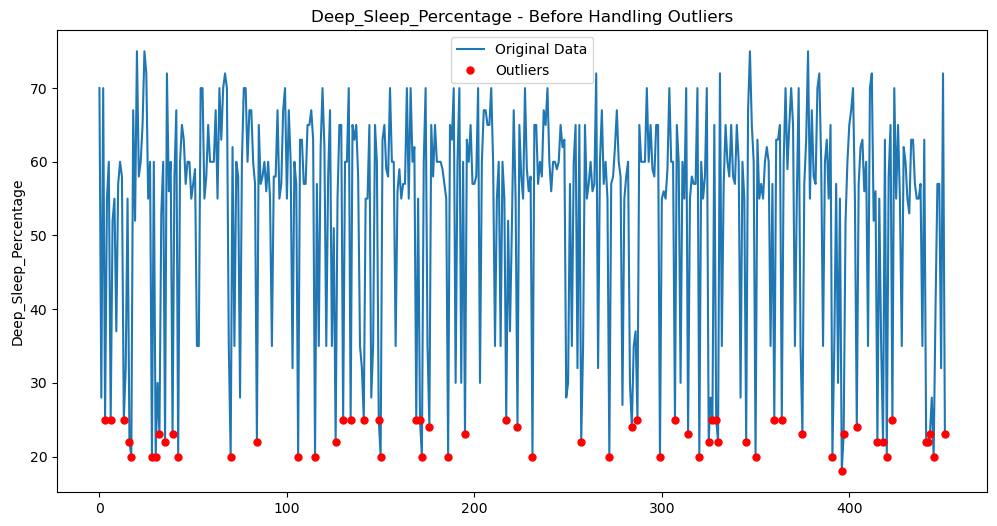

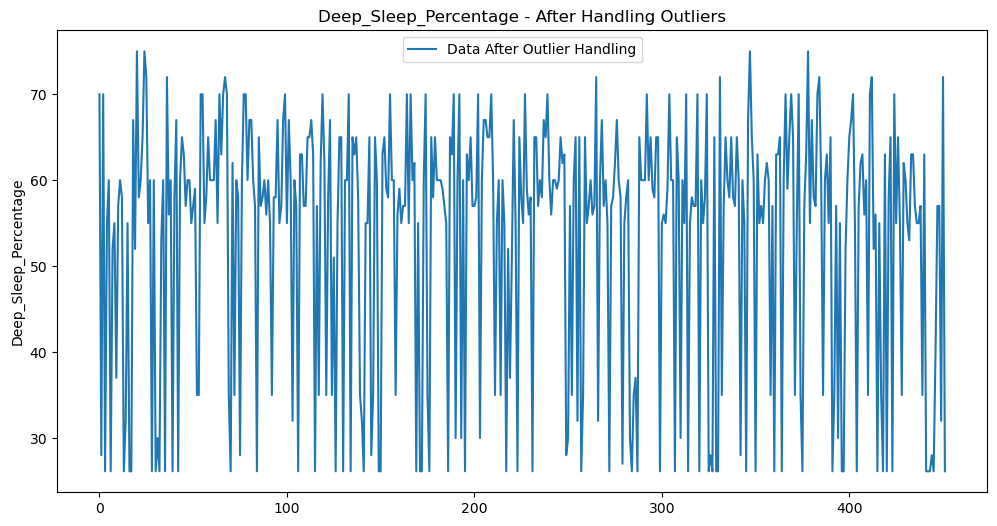

Feature: Light_Sleep_Percentage
lower_bound -11.25
upper_bound 58.75


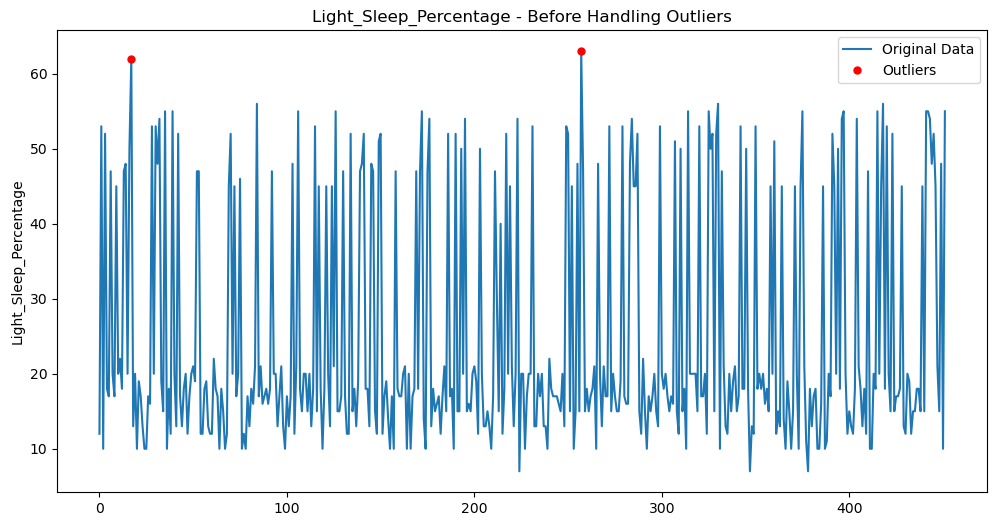

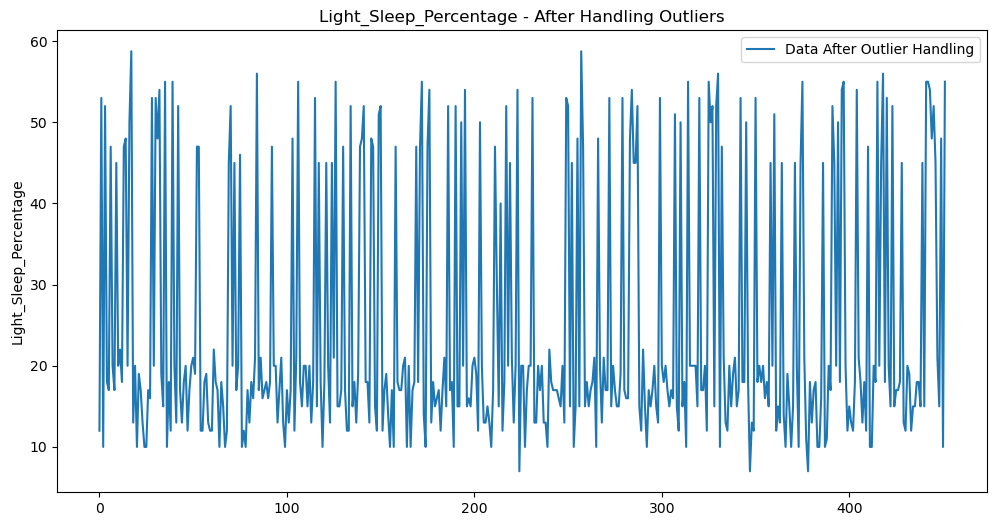

Feature: Caffeine_Consumption
lower_bound -75.0
upper_bound 125.0


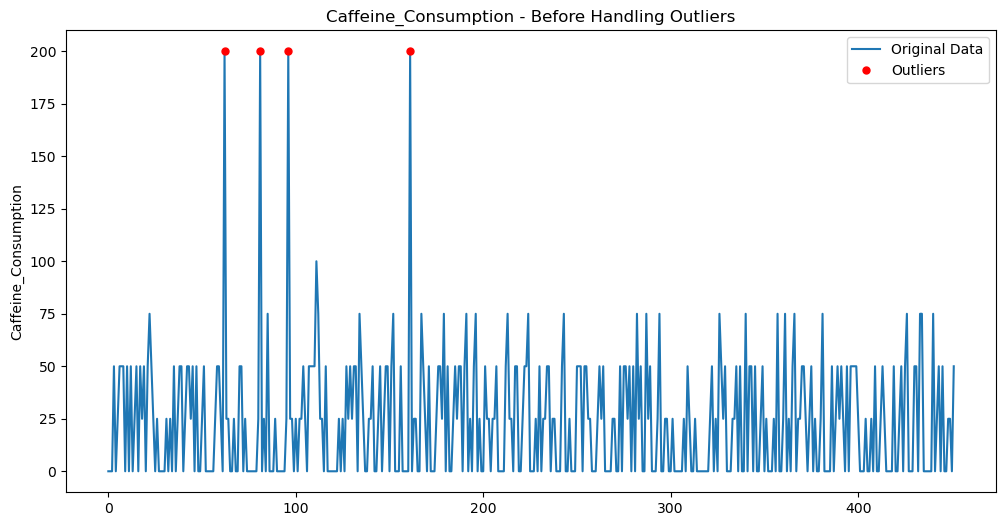

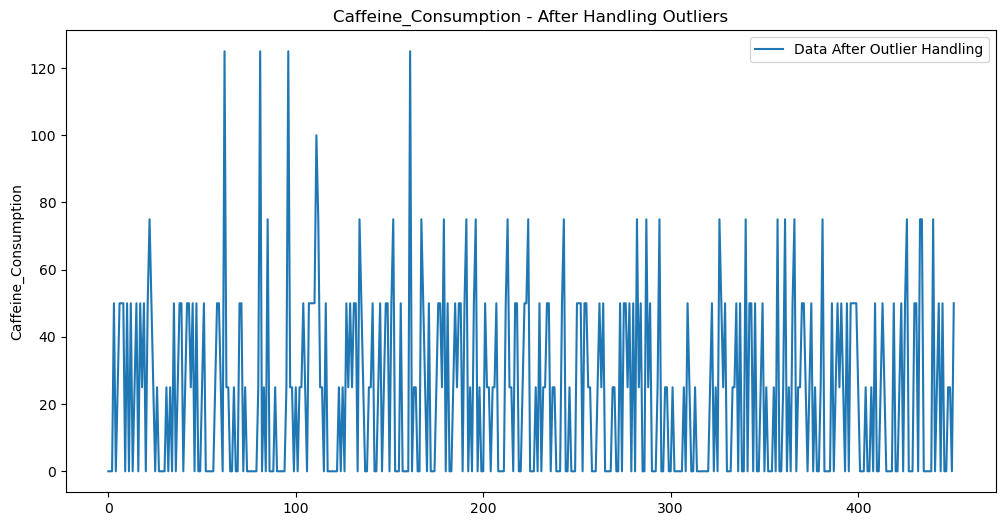

In [189]:
# Removing Outliers

columns_values = ['Sleep_Duration', 'Deep_Sleep_Percentage', 'Light_Sleep_Percentage', 'Caffeine_Consumption']
for i, feature in enumerate(columns_values, 1):
    # Calculate IQR to identify anomalies
    Q1 = sleep_clean[feature].quantile(0.25)
    Q3 = sleep_clean[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for anomalies
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print ("Feature:", feature)
    print("lower_bound", lower_bound)
    print("upper_bound", upper_bound)
    
    # Identify anomalies (outliers)
    sleep_clean['Anomaly_IQR'] = (sleep_clean[feature] < lower_bound) | (sleep_clean[feature] > upper_bound)
    
    # Plot data before handling outliers
    plt.figure(figsize=(12, 6))
    plt.plot(sleep_clean.index, sleep_clean[feature], label='Original Data')
    plt.plot(sleep_clean[sleep_clean['Anomaly_IQR']].index, sleep_clean[sleep_clean['Anomaly_IQR']][feature], 'ro', markersize=5, label='Outliers')
    plt.ylabel(feature)  # Set y-axis label to feature name
    plt.title(f'{feature} - Before Handling Outliers')
    plt.legend()
    plt.show()
    
    # Handle outliers by clipping
    sleep_clean[feature] = sleep_clean[feature].clip(lower=lower_bound, upper=upper_bound)
    
    # Plot data after handling outliers
    plt.figure(figsize=(12, 6))
    plt.plot(sleep_clean.index, sleep_clean[feature], label='Data After Outlier Handling')
    plt.ylabel(feature)  # Set y-axis label to feature name
    plt.title(f'{feature} - After Handling Outliers')
    plt.legend()
    plt.show()

In [191]:
# Dropping the 'Anomaly_IQR' column added during the outlier visualization step
sleep_clean = sleep_clean.drop(columns=['Anomaly_IQR'], errors='ignore')

In [193]:
# C – Appropriately encoding categorical variables
sleep_clean = pd.get_dummies(sleep_clean, columns=categorical, drop_first=True)
# Convert all boolean columns to integers
for column in sleep_clean.select_dtypes(include=['bool']).columns:
    sleep_clean[column] = sleep_clean[column].astype(int)

# Reorder columns: move 'Sleep_Efficiency' to the last position
cols = [col for col in sleep_clean.columns if col != 'Sleep_Efficiency'] + ['Sleep_Efficiency']
sleep_clean = sleep_clean[cols]

sleep_clean  # To display encoded and reordered dataframe

,Age,Bedtime,Wakeup_Time,Sleep_Duration,REM_Sleep_Percentage,Deep_Sleep_Percentage,Light_Sleep_Percentage,Awakenings,Caffeine_Consumption,Alcohol_Consumption,Exercise_Frequency,Gender_Male,Smoking_Status_Yes,Sleep_Efficiency
0,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,18,70.000,12.0,0.0,0.0,0.0,3.0,0,1,0.88
1,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,19,28.000,53.0,3.0,0.0,3.0,3.0,1,1,0.66
2,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,20,70.000,10.0,1.0,0.0,0.0,3.0,0,0,0.89
3,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,23,26.125,52.0,3.0,50.0,5.0,1.0,0,1,0.51
4,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,27,55.000,18.0,3.0,0.0,3.0,3.0,1,0,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,22,57.000,21.0,0.0,0.0,0.0,5.0,0,0,0.91
448,52,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,28,57.000,15.0,4.0,25.0,0.0,3.0,1,0,0.74
449,40,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,20,32.000,48.0,1.0,25.0,3.0,0.0,0,1,0.55
450,45,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,18,72.000,10.0,3.0,0.0,0.0,3.0,1,0,0.76


In [195]:
# Extracting the time component only of Bedtime and Wakeup_Time and converting them to float
sleep_clean['Bedtime']= pd.to_timedelta(sleep_clean['Bedtime'].dt.strftime('%H:%M:%S'))
sleep_clean['Wakeup_Time'] = pd.to_timedelta(sleep_clean['Wakeup_Time'].dt.strftime('%H:%M:%S'))
# Converting to float
sleep_clean['Bedtime']= sleep_clean['Bedtime']/pd.offsets.Hour(1)
sleep_clean['Wakeup_Time'] = sleep_clean['Wakeup_Time']/pd.offsets.Hour(1)

# Checking updated dataframe
sleep_clean.head()

,Age,Bedtime,Wakeup_Time,Sleep_Duration,REM_Sleep_Percentage,Deep_Sleep_Percentage,Light_Sleep_Percentage,Awakenings,Caffeine_Consumption,Alcohol_Consumption,Exercise_Frequency,Gender_Male,Smoking_Status_Yes,Sleep_Efficiency
0,65,1.0,7.0,6.0,18,70.000,12.0,0.0,0.0,0.0,3.0,0,1,0.88
1,69,2.0,9.0,7.0,19,28.000,53.0,3.0,0.0,3.0,3.0,1,1,0.66
2,40,21.5,5.5,8.0,20,70.000,10.0,1.0,0.0,0.0,3.0,0,0,0.89
3,40,2.5,8.5,6.0,23,26.125,52.0,3.0,50.0,5.0,1.0,0,1,0.51
4,57,1.0,9.0,8.0,27,55.000,18.0,3.0,0.0,3.0,3.0,1,0,0.76


In [199]:
# D – Splitting the dataset into training and testing sets
# B – Performing scaling or normalization

X = sleep_clean.drop(columns=['Sleep_Efficiency'], axis=1)  # Features (X - independent variables)
y = sleep_clean['Sleep_Efficiency']  # Target variable (y-dependent variable)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [201]:
### TASK 2 – Model Building with Hyper-parameter Tuning

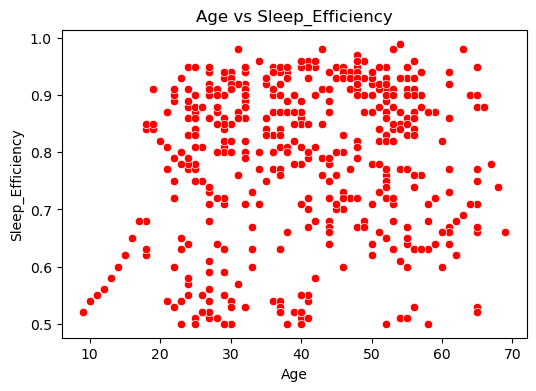

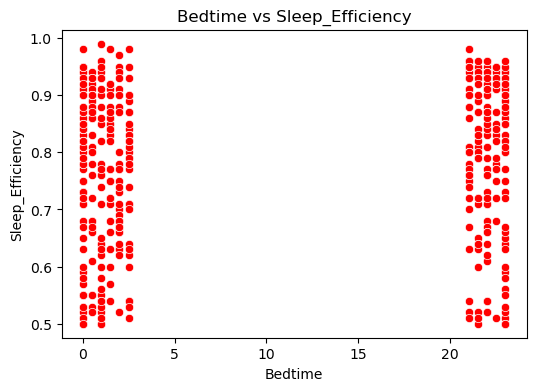

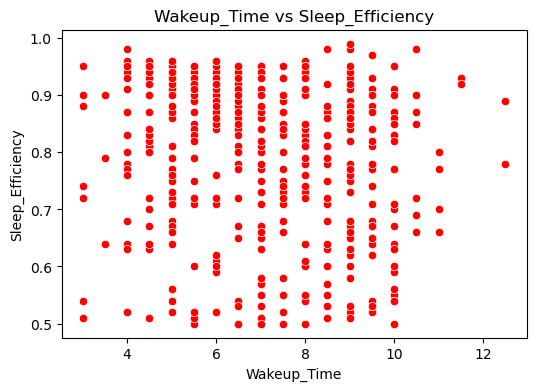

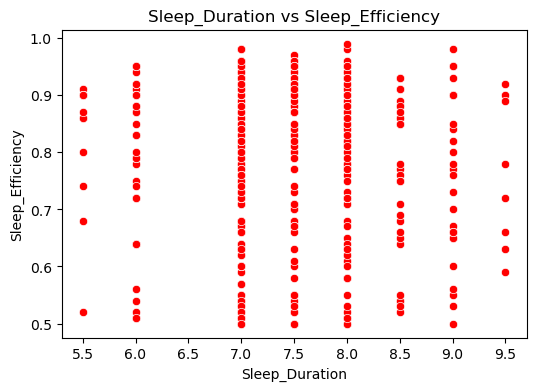

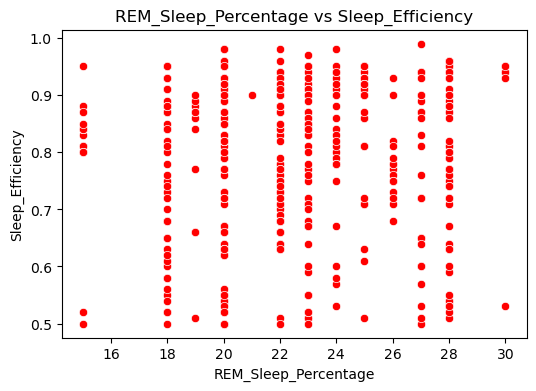

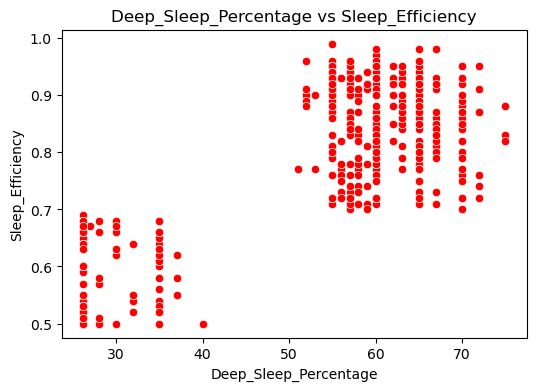

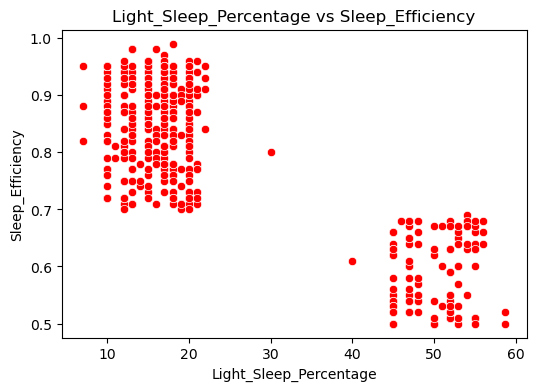

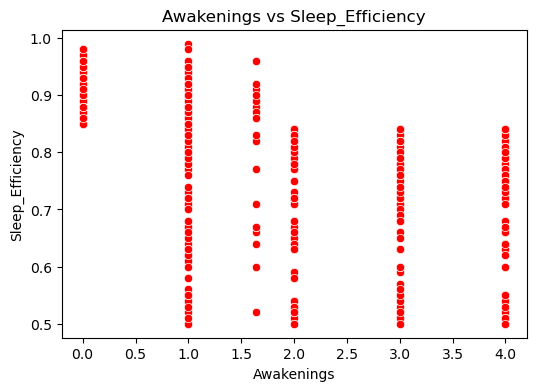

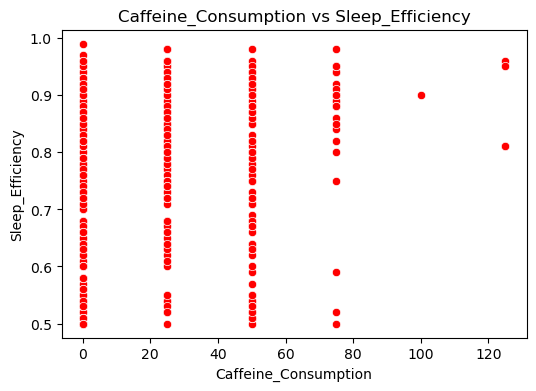

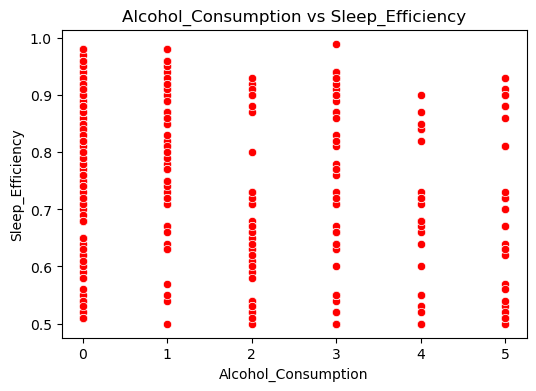

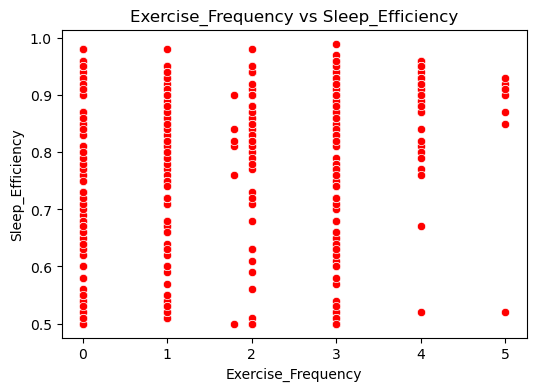

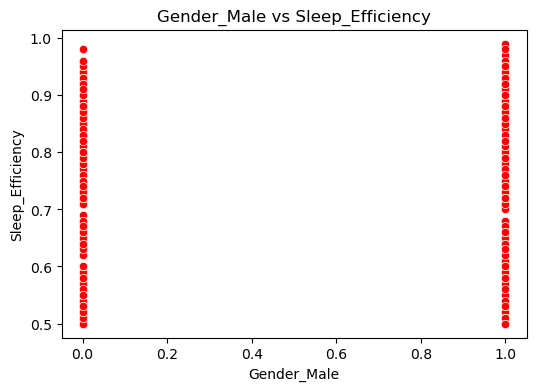

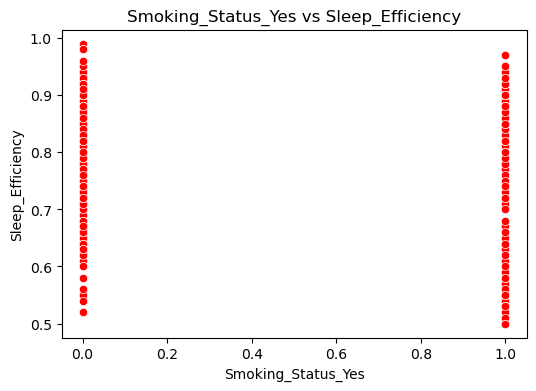

In [293]:
# A – Choosing any appropriate regression model to predict the target variable
# Visualizing the data by creating scatter plots for each independent variable against Sleep_Efficiency.

# Define independent variables (excluding Sleep_Efficiency)
independent_vars = [col for col in sleep_clean.columns if col != 'Sleep_Efficiency']

# Create scatter plots for each independent variable against Sleep_Efficiency
for col in independent_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=sleep_clean[col], y=sleep_clean['Sleep_Efficiency'], color = 'red')
    plt.xlabel(col)
    plt.ylabel('Sleep_Efficiency')
    plt.title(f'{col} vs Sleep_Efficiency')
    plt.show()

In [219]:
# Note: Linear Regression serves as a baseline model for comparison with Ridge and Lasso.

# 1Initialize the Linear Regression Model
linear_model = LinearRegression()

# Train the model on the training dataset
linear_model.fit(X_train, y_train)

# Predict the target variable for the test dataset
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Model Performance using MAE, RMSE, and R²
linear_mae = mean_absolute_error(y_test, y_pred_linear)  # Mean Absolute Error
linear_mse = mean_squared_error(y_test, y_pred_linear)   # Mean Squared Error
linear_rmse = np.sqrt(linear_mse)  # Root Mean Squared Error
linear_r2 = r2_score(y_test, y_pred_linear)  # R^2 Score

# Print the Evaluation Results
print(font.apply("\nLinear Regression Model Evaluation:", 'Red/Bold/Underline/Yellow_BG'))
print(f"Mean Absolute Error (MAE): {linear_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.2f}")
print(f"R² Score: {linear_r2:.2f}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (RMSE): 0.06
R² Score: 0.79


In [221]:
#Defining the alpha Hyperparameter Grid
param_grid = {'alpha': np.logspace(-3, 3, 50)}
#Generates a range of alpha values from 0.001 to 1000, spaced logarithmically.
#50 values will be generated between (0.001) and  (1000), all spaced logarithmically.
param_grid

{'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
        3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
        9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
        2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
        9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
        2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
        8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
        2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
        8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
        2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
        7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
        2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
        7.54312006e+02, 1.00000000e+03])}

In [225]:
#Option 1: Apply Grid Search with Ridge Regression

# Define Ridge model
ridge = Ridge()

# Perform Grid Search
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_ridge = ridge_grid_search.best_params_['alpha']
print(font.apply(f"Best Alpha for Ridge (Grid Search):{best_alpha_ridge}", 'Green/Bold' ))
best_ridge = ridge_grid_search.best_estimator_  # Store the best Ridge model

Best Alpha for Ridge (Grid Search):14.563484775012444


In [227]:
#Option 2: Apply Random Search with Ridge Regression
# Define Ridge model
ridge = Ridge()

# Perform Random Search with 20 iterations
ridge_random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
ridge_random_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_ridge = ridge_random_search.best_params_['alpha']
print(font.apply(f"Best Alpha for Ridge (Random Search):{best_alpha_ridge}", 'Green/Bold' ))
best_ridge = ridge_random_search.best_estimator_  # Store the best Ridge model

Best Alpha for Ridge (Random Search):8.286427728546842


In [231]:
#Option 3: Apply Grid Search with Lasso Regression

# Define Lasso model
lasso = Lasso()

# Perform Grid Search
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_lasso = lasso_grid_search.best_params_['alpha']
print(font.apply(f"Best Alpha for Lasso (Grid Search):{best_alpha_lasso}", 'Purple/Bold' ))
best_lasso = lasso_grid_search.best_estimator_  # Store the best Lasso model

Best Alpha for Lasso (Grid Search):0.0017575106248547913


In [233]:
#Option 4: Apply Random Search with Lasso Regression
# Define Lasso model
lasso = Lasso()

# Perform Random Search with 20 iterations
lasso_random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
lasso_random_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_lasso = lasso_random_search.best_params_['alpha']
print(font.apply(f"Best Alpha for Lasso (Random Search):{best_alpha_lasso}", 'Purple/Bold' ))
best_lasso = lasso_random_search.best_estimator_  # Store the best Lasso model

Best Alpha for Lasso (Random Search):0.002329951810515372


In [237]:
# C – Building the regression models using the training data 
# Step 1: These best alpha values were obtained from Question (b)
best_alpha_ridge = ridge_grid_search.best_params_['alpha']  # Best alpha from Ridge tuning
best_alpha_lasso = lasso_grid_search.best_params_['alpha']  # Best alpha from Lasso tuning

print(font.apply(f"Best Alpha for Ridge:{best_alpha_ridge}", 'Green/Bold'))
print(font.apply(f"Best Alpha for Lasso:{best_alpha_lasso}\n", 'Purple/Bold'))


#Step 2: Build the regression models using the training data

# Train Ridge Regression using the best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)
print("Ridge Regression model trained successfully.")


# Train Lasso Regression using the best alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)

print("Lasso Regression model trained successfully.")

Best Alpha for Ridge:14.563484775012444
Best Alpha for Lasso:0.0017575106248547913

Ridge Regression model trained successfully.
Lasso Regression model trained successfully.


In [239]:
### TASK 3 – Model Evaluation and Selection

In [257]:
# A – Evaluating the performance of the regression models using appropriate metrics
# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(font.apply(f"{model_name} Model Evaluation:", 'Blue/Bold/Underline'))
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}\n")
    
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

# Predicting the target variable for the test dataset
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluating all models
results = {
    "Linear Regression": evaluate_model(y_test, y_pred_linear, "Linear Regression"),
    "Ridge Regression": evaluate_model(y_test, y_pred_ridge, "Ridge Regression"),
    "Lasso Regression": evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
}

# Converting results to DataFrame for better readability
results_df = pd.DataFrame(results).T
print(font.apply("\nModel Evaluation Results", 'Blue/Bold/Underline/Yellow_BG'))
results_df

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R² Score: 0.79

Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R² Score: 0.79

Lasso Regression Model Evaluation:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06
R² Score: 0.79


Model Evaluation Results


,MAE,MSE,RMSE,R²
Linear Regression,0.050986,0.003904,0.062480,0.790323
Ridge Regression,0.051288,0.003908,0.062511,0.790116
Lasso Regression,0.051302,0.003905,0.062487,0.790281


In [295]:
# B – Implementing k-fold cross-validation
# Perform 5-fold cross-validation and store results
for name, model in zip(["Linear", "Ridge", "Lasso"], [linear_model, ridge_model, lasso_model]):
    cv_mae = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error'))
    cv_mse = -np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    cv_rmse = np.sqrt(cv_mse)
    cv_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2'))
    results[name + " Regression"]["CV MAE"] = cv_mae
    results[name + " Regression"]["CV MSE"] = cv_mse
    results[name + " Regression"]["CV RMSE"] = cv_rmse
    results[name + " Regression"]["CV R2"] = cv_r2

# Convert results to DataFrame again after adding cross-validation results
cv_results_df = pd.DataFrame(results).T
print(font.apply("\nModel Evaluation with Cross-Validation:", 'Blue/Bold/Underline/Yellow_BG'))
cv_results_df


Model Evaluation with Cross-Validation:


,MAE,MSE,RMSE,R²,CV MAE,CV RMSE,CV MSE,CV R2
Linear Regression,0.050986,0.003904,0.062480,0.790323,0.050947,0.062453,0.003900,0.777083
Ridge Regression,0.051288,0.003908,0.062511,0.790116,0.050546,0.061933,0.003836,0.780640
Lasso Regression,0.051302,0.003905,0.062487,0.790281,0.050821,0.062166,0.003865,0.778809


In [297]:
#C – Selecting the best-performing regression model based on hyperparameter tuning and cross-validation results
# Selecting the best model based on lowest MAE & RMSE and highest R²
best_model_name = min(results, key=lambda x: (results[x]['CV MAE'], results[x]['CV RMSE'], -results[x]['CV R2']))

print(font.apply(f"\nThe Best Performing Model is: {best_model_name.upper()}\n",'Blue/Bold/Underline/Yellow_BG'))
print(f"Performance: {results[best_model_name]}\n")

print(font.apply(f"Justifications for selecting {best_model_name}", 'Black/Bold/Underline'))
print("* Model selected based on lower MAE and RMSE while maintaining a high R² score after Cross-Validation.")

# Model-specific justifications
justifications = {
    "Lasso Regression": "* Lasso helps in feature selection, making the model more interpretable and reducing complexity.",
    "Ridge Regression": "* Ridge provides better generalization with a more stable performance across different folds. It helps in handling multicollinearity without eliminating any important features.",
    "Linear Regression": "* Linear Regression had a better performance as it does not perform any shrinkage or feature selection. It directly calculates coefficients for each feature without any penalty."
}
print(justifications.get(best_model_name, "No specific justification found."))


The Best Performing Model is: RIDGE REGRESSION

Performance: {'MAE': 0.05128837606198702, 'MSE': 0.00390764062982387, 'RMSE': 0.06251112404863529, 'R²': 0.7901156465422584, 'CV MAE': 0.05054648795437853, 'CV RMSE': 0.061933116468230506, 'CV MSE': 0.003835710915467405, 'CV R2': 0.7806401002442176}

Justifications for selecting Ridge Regression
* Model selected based on lower MAE and RMSE while maintaining a high R² score after Cross-Validation.
* Ridge provides better generalization with a more stable performance across different folds. It helps in handling multicollinearity without eliminating any important features.
